<a href="https://colab.research.google.com/github/Jojo-357/IMDB_minor_project/blob/main/MINOR_PROJECT_JOEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall(".")  # Extract to current directory


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### READING THE DATASET

1.   Top 5 rows

In [4]:
df = pd.read_csv('Medicaldataset.csv')
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


2. shape and information

In [8]:
df.shape

(1319, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [10]:
# Null values
pd.set_option('display.max_rows',100)
df.isnull().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


In [11]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


### DATA ANALYSIS

1. Understanding Target value

In [12]:
df['Result'].value_counts(normalize=True)

,proportion
Result,
positive,0.614102
negative,0.385898


2. Visualization

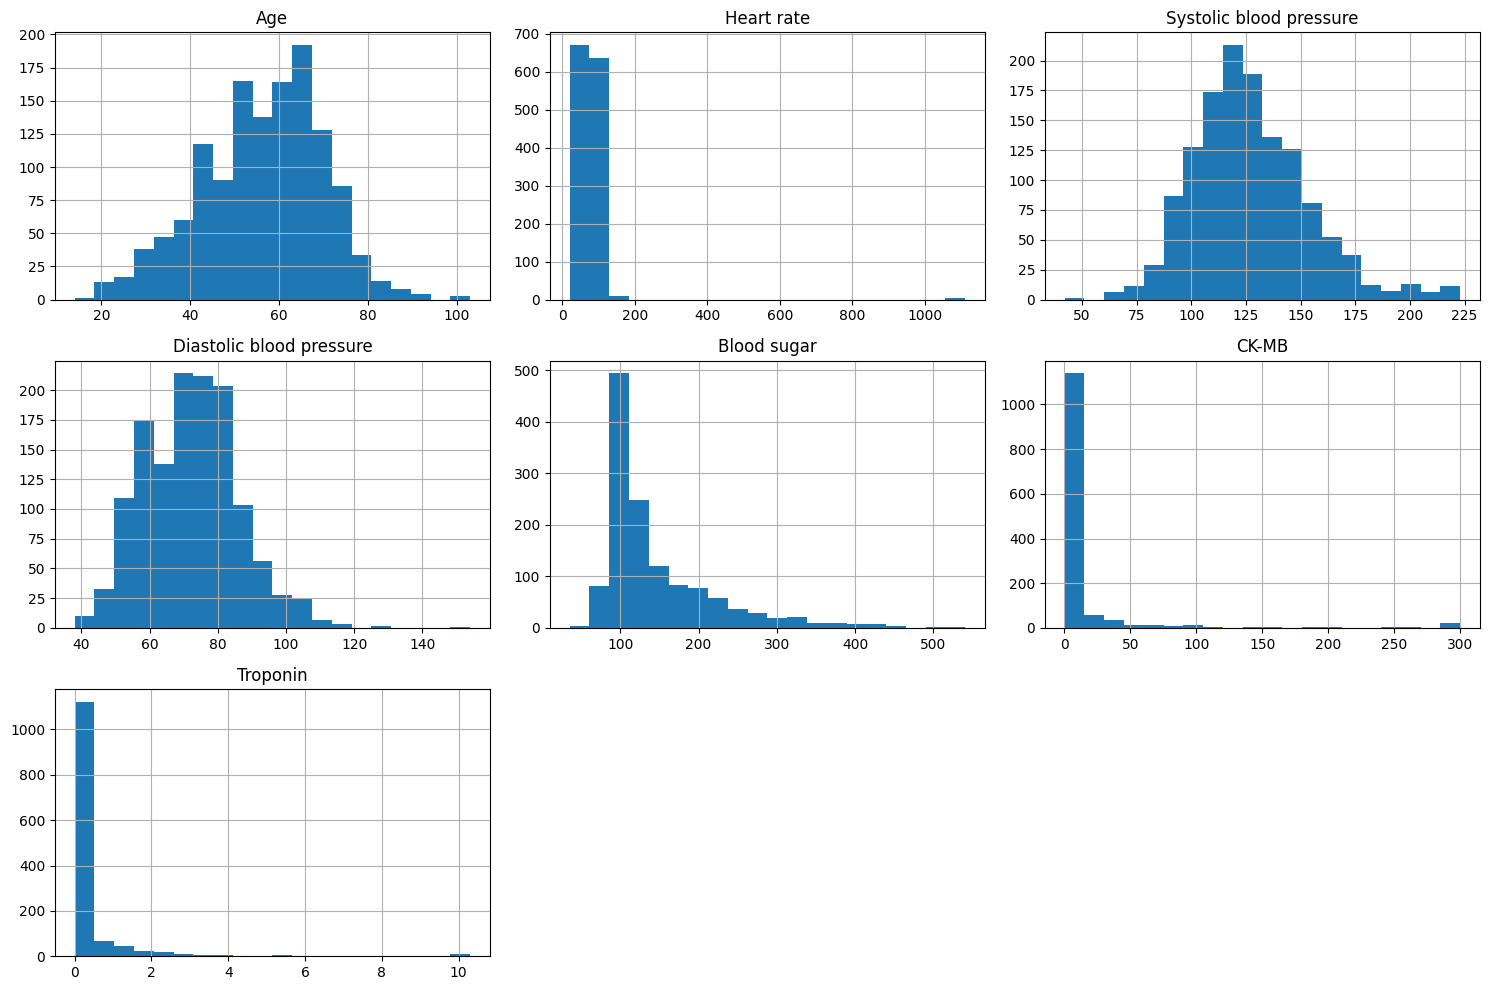

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
df[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


<Axes: xlabel='Result', ylabel='count'>

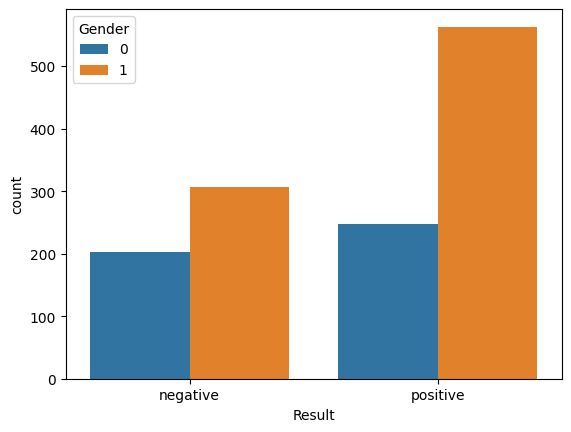

In [14]:
sns.countplot(x='Result', hue='Gender', data=df)

3. Comparing avergae positive and negative cases

In [16]:
df.groupby('Result')[numerical_cols].mean()

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Result,,,,,,,
negative,52.094303,77.886051,127.856582,72.440079,149.757760,2.555344,0.026988
positive,58.766667,78.619753,126.739506,72.161728,144.671605,23.266838,0.570798


Boxplots

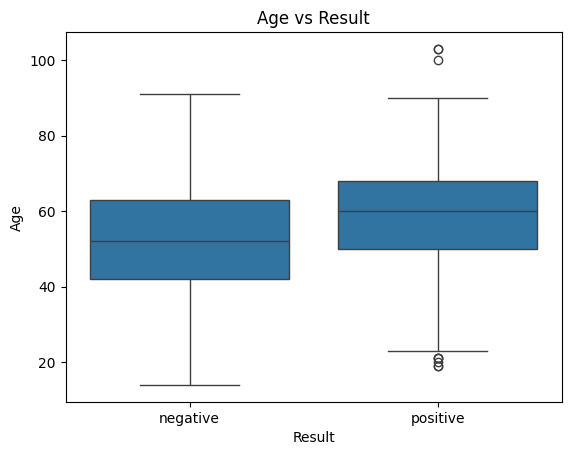

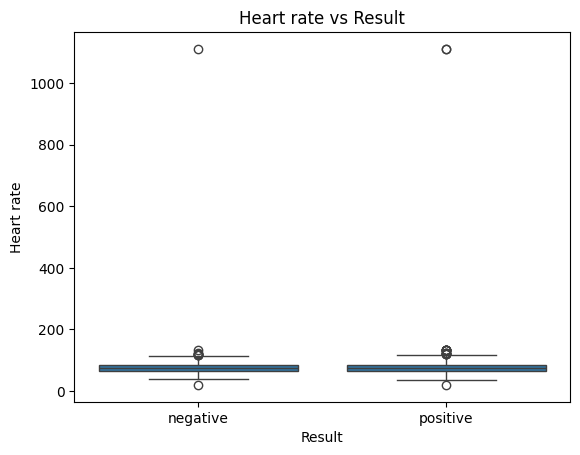

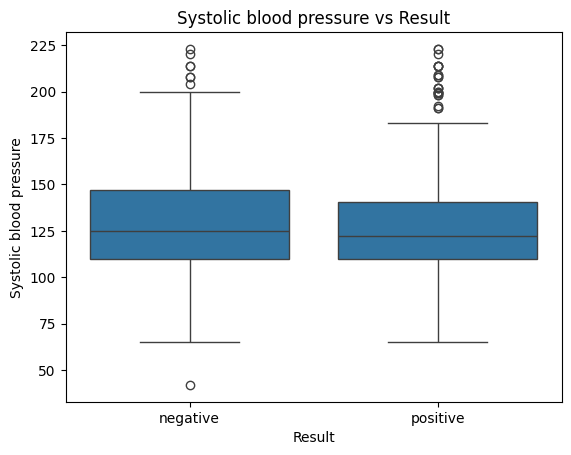

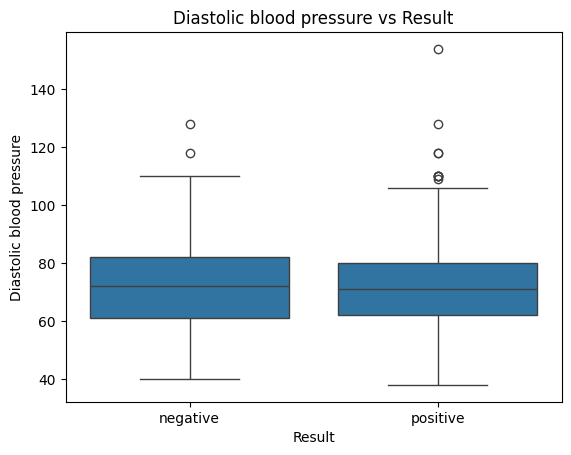

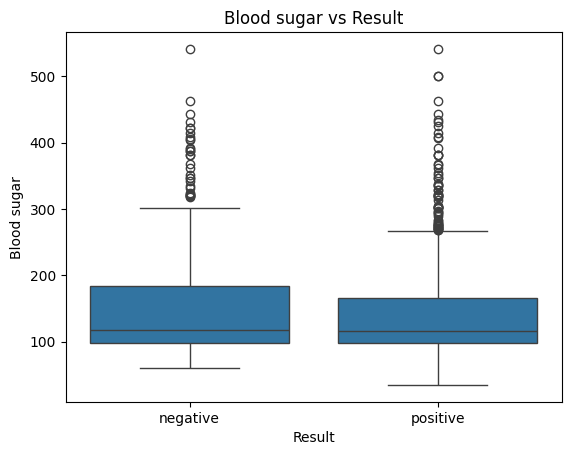

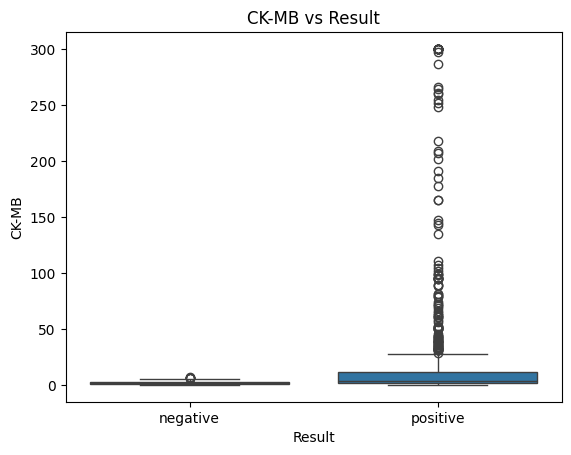

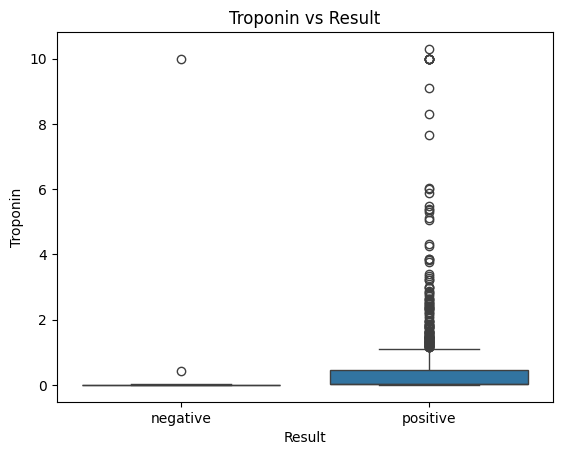

In [17]:
for col in numerical_cols:
    sns.boxplot(x='Result', y=col, data=df)
    plt.title(f'{col} vs Result')
    plt.show()


Correlation Matrices

<Axes: >

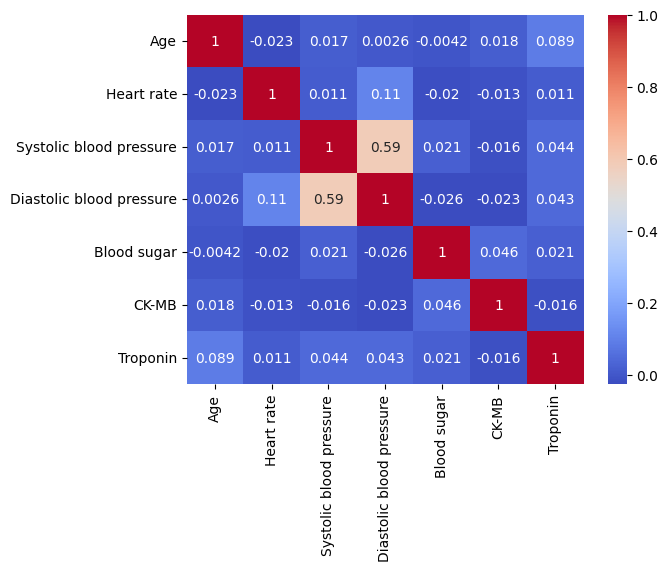

In [18]:
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Checking

In [19]:
df['Result_binary'] = df['Result'].map({'negative': 0, 'positive': 1})
df.corr(numeric_only=True)['Result_binary'].sort_values(ascending=False)

,Result_binary
Result_binary,1.000000
Age,0.238097
Troponin,0.229376
CK-MB,0.217720
Gender,0.094432
Heart rate,0.006920
Diastolic blood pressure,-0.009659
Systolic blood pressure,-0.020825
Blood sugar,-0.033059


Pie Plot

Text(0.5, 1.0, 'Result Proportions')

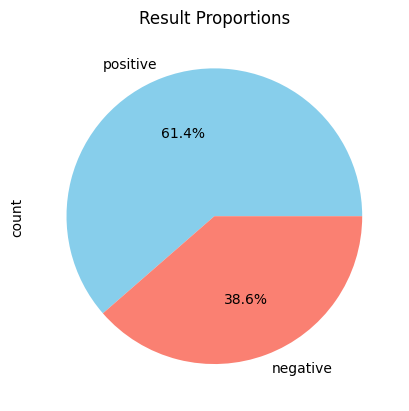

In [20]:
df['Result'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Result Proportions')

KDE (DENSITY) PLOTS

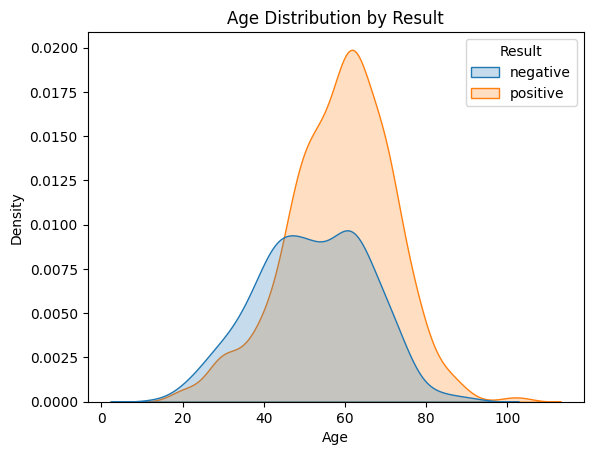

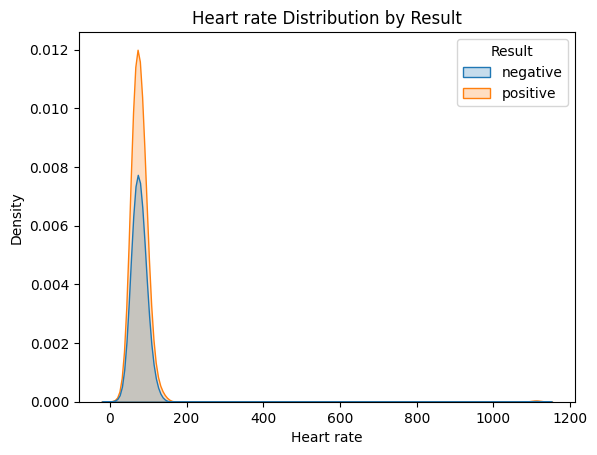

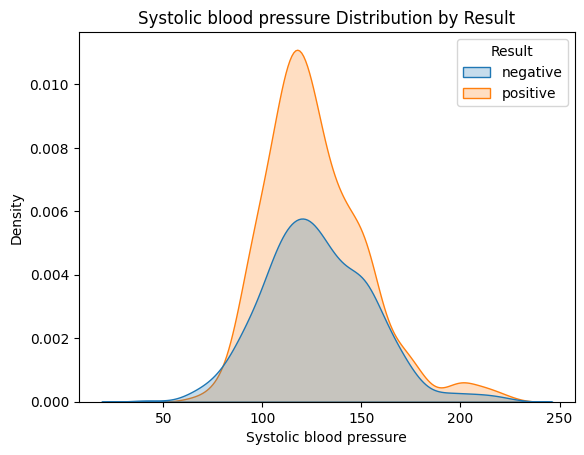

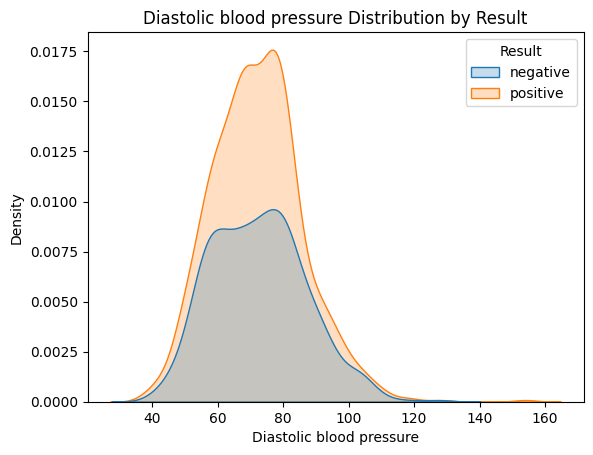

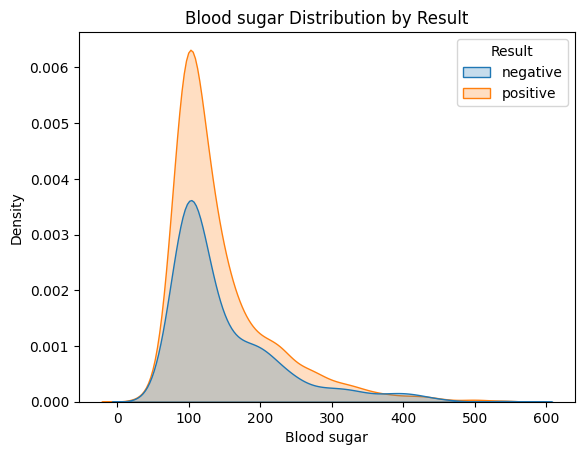

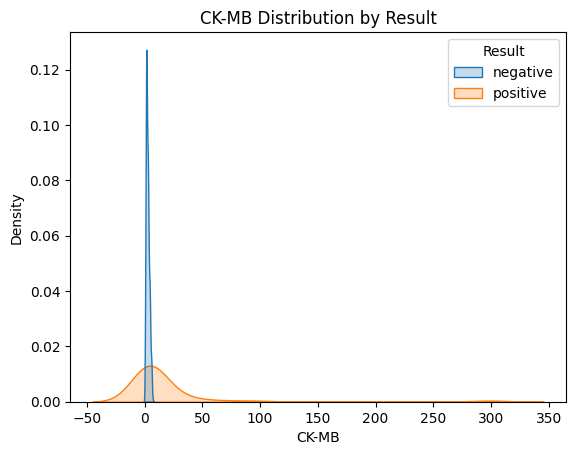

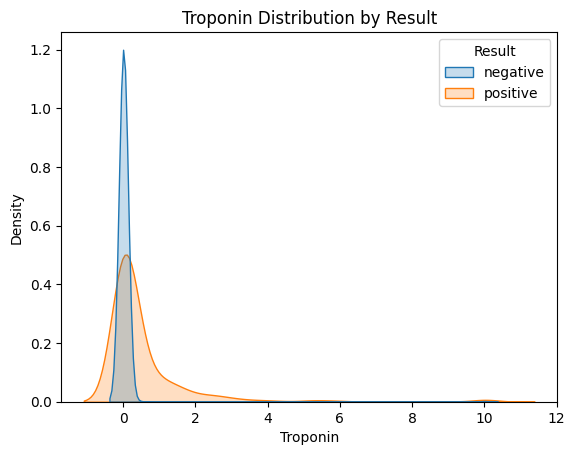

In [21]:
for col in numerical_cols:
    sns.kdeplot(data=df, x=col, hue='Result', fill=True)
    plt.title(f'{col} Distribution by Result')
    plt.show()

3D Scatter Plot

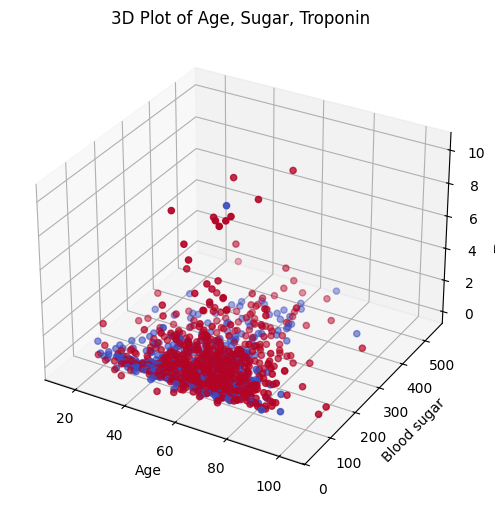

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Blood sugar'], df['Troponin'], c=df['Result_binary'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Blood sugar')
ax.set_zlabel('Troponin')
plt.title('3D Plot of Age, Sugar, Troponin')
plt.show()